In [7]:
import pandas as pd
import numpy as np
# plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks',
    font='Arial', font_scale=1,
    rc={'figure.figsize':(4,4)})
sns.set_palette('pastel')

plt.rcParams["figure.figsize"] = (4,4)
#  (extra)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (4, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

%matplotlib inline

In [5]:
df = pd.read_csv('./a6_b0_format_t0p5.tsv',delimiter='\t')
df.head()

,Solution index,Deletion_id,module_rxns,compatible_products
0,1,"ECH, ACALD, PEPCK_re, POR, PGM, RNF",NaN,"ibutoh, btylace, btylpro, btylbut, btylibut, i..."
1,2,"ECH, GLUDy, ALCD2x, PGM, H2ASE_syn, BIF",NaN,"btylace, btylpro, btylbut, btylibut, ibtylbut"
2,3,"GLUSy, PPDK, GLUDy, PGM, H2ASE_syn, FRNDPR2r",NaN,"etoh, ibutoh, ibtylace, ibtylpro, ibtylbut, ib..."
3,4,"ECH, PEPCK_re, PGM, RNF, H2ASE_syn, BIF",NaN,NaN
4,5,"ACALD, PEPCK_re, PGM, RNF, BIF, FRNDPR2r",NaN,"btoh, btylace, btylbut"


In [46]:
designs = [set(i[1].split(', ')) for i in df['Deletion_id'].iteritems()]
alldes = set.union(*designs)

res = pd.DataFrame(0, columns=alldes, index=df['Solution index'])

for index, row in df.iterrows():
    for deletion in row['Deletion_id'].split(', '):
        res.loc[row['Solution index'],deletion] = 1
        
res.head()

,CEPA,PFL,AHSL,PEPCK_re,ECH,LDH_L,ALCD2x,H2ASE_syn,RNF,PGM,GLUDy,POR,ACALD,GLUSy,PPDK,BIF,GMPS,FRNDPR2r
Solution index,,,,,,,,,,,,,,,,,,
1,0,0,0,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0
2,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1
4,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,1,0,0
5,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1


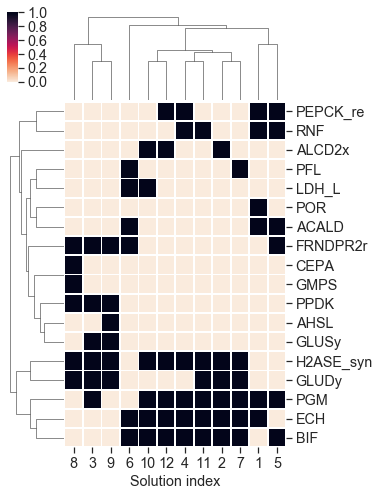

In [58]:

g = sns.clustermap(res.transpose(), cmap=sns.cm.rocket_r,
                  linewidth=.75,figsize=(5,8))
g.savefig('ps.svg')


In [ ]:
# clustermap
g = sns.clustermap(df_names.transpose(),
                       cmap="Blues",linewidths=.75, figsize=tuple([args.width, args.height]),
                       cbar_kws={"label": "Objective value", "ticks":[0,0.3,0.6,0.9]},
                       annot=args.annot)
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0);
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90);

    # Use full name
    g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels())

    # save
    g.savefig('pf-{}.svg'.format(os.path.splitext(os.path.basename(args.pf_path))[0]), format='svg')
